# Abell 2255 Analysis

Abell 225 is a galaxy cluster located at approx. RA = 258.1292, DEC = 64.0925

We have already added all objects from the approximate location of Abell 2255 into data/sdss_data.csv

### Imports

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Handling

In [24]:
data = pd.read_csv("../data/sdss_data.csv")
data = data[data.type == 3]
data['u_g'] = data['modelMag_u'] - data['modelMag_g']
data['g_r'] = data['modelMag_g'] - data['modelMag_r']

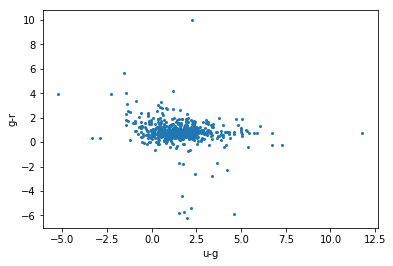

In [26]:
plt.scatter(x=data.u_g, y=data.g_r, s=4)
plt.xlabel("u-g")
plt.ylabel("g-r")
plt.show()